<font size=5> **[넷플릭스 데이터를 활용한 추천 시스템 개발]** </font>
- netflix_titles.csv 데이터를 활용하여 주요 데이터 시각화 및 추천 시스템을 개발하시오
- 각 마크다운 셀의 내용을 참고하여 비어있는 코드 셀에 코드를 작성한다.
- 제시된 아웃풋은 참고이며 반드시 동일할 필요는 없다.

# 데이터 로딩

In [100]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

netflix = pd.read_csv('./평가/netflix_titles.csv')
print(netflix.shape)
display(netflix.head(2))

print(len(netflix['type'].unique()))

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


2


# 주요 데이터 시각화

## TV Show vs Movies (콘텐츠 타입) 막대 그래프

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


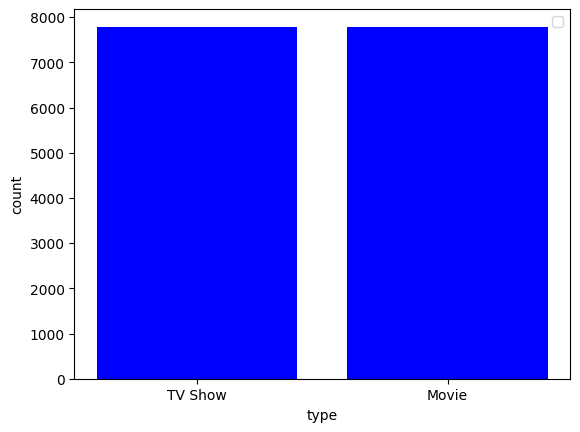

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'D2Coding ligature'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('default')

labels = ['TV Show','Movie']
x = np.arange(len(netflix['type'].unique()))
y = netflix['type'].count()

plt.bar([labels[0],labels[1]],y,color='b') 
plt.xlabel('type')
plt.ylabel('count')
plt.xticks(x,labels)
# plt.yticks(0,6000,1000)
plt.legend()
plt.show()

## 제작 국가별 수평 막대 그래프
- 결측 값 확인 및 결측 값을 포함한 레코드 삭제
- 2개 이상의 제작국가 값을 가지고 있는 레코드는 ‘,’를 기준으로 분류하여 카운팅 한다.
- 상위 10개국에 대한 막대그래프를 그린다.

In [102]:
#- 결측 값 확인 및 결측 값을 포함한 레코드 삭제
netflix = netflix.dropna()
print("없니?",netflix[netflix['country'].isna()])
netflix.head()

checked_netflix = netflix.isna().sum()
checked_netflix

없니? Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [103]:
# - 2개 이상의 제작국가 값을 가지고 있는 레코드는 ‘,’를 기준으로 분류하여 카운팅 한다.
netflix['country'] = netflix['country'].apply(lambda x : x.split(','))
print(netflix['country'])
print(netflix['country'].value_counts())

1                                                [Mexico]
2                                             [Singapore]
3                                         [United States]
4                                         [United States]
5                                                [Turkey]
                              ...                        
7778                                      [United States]
7780                                              [India]
7781                                      [United States]
7782    [Sweden,  Czech Republic,  United Kingdom,  De...
7783                                              [India]
Name: country, Length: 4808, dtype: object
country
[United States]                                                       1653
[India]                                                                832
[United Kingdom]                                                       174
[Canada]                                                               104
[Egypt]    

In [110]:
# - 상위 10개국에 대한 막대그래프를 그린다.
top_10 = netflix.sort_values('country',ascending=False).head(10)
top_10

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1493,s1494,Movie,Cook Off,Tomas Brickhill,"Tendaiishe Chitima, Tendai Nguni, Jesese Mungo...",[Zimbabwe],"June 1, 2020",2017,TV-G,100 min,"Comedies, International Movies, Romantic Movies","Yearning for a better life, a single mother wi..."
2318,s2319,Movie,Furie,Le Van Kiet,"Ngo Thanh Van, Phan Thanh Nhien, Mai Cat Vi, T...",[Vietnam],"September 25, 2019",2019,TV-MA,97 min,"Action & Adventure, Dramas, International Movies",When traffickers kidnap her daughter from thei...
3105,s3106,Movie,Jackpot,Dustin Nguyen,"Chi Tai, Lan Ngoc, Dustin Nguyen, Thu Trang",[Vietnam],"October 6, 2018",2015,TV-14,92 min,"Comedies, Dramas, International Movies",A lottery ticket salesperson faces an ethical ...
5654,s5655,Movie,Sky Tour: The Movie,Nguyen Thanh Tung,Son Tung M-TP,[Vietnam],"September 2, 2020",2020,TV-G,93 min,"Documentaries, International Movies, Music & M...","From the preparations to the performances, thi..."
1482,s1483,Movie,Conjuring Spirit,Van M. Pham,"Phuong Mai, Quang Su, Hoang Phuc Nguyen, Chi P...",[Vietnam],"August 28, 2018",2014,TV-MA,112 min,"Horror Movies, International Movies, Thrillers","In the wake of her husband's betrayal, a novel..."
939,s940,Movie,Bitcoin Heist,Ham Tran,"Kate Nhung, Thanh Pham, Petey Majik Nguyen, Su...",[Vietnam],"September 2, 2017",2016,TV-14,116 min,"Action & Adventure, Comedies, International Mo...","A unconventional, efficient Interpol special a..."
1950,s1951,Movie,El Che,Matías Gueilburt,Paco Ignacio Taibo II,[Venezuela],"October 15, 2017",2017,TV-14,119 min,"Documentaries, International Movies",Spanish-Mexican writer Paco Ignacio Taibo II h...
826,s827,Movie,Belmonte,Federico Veiroj,"Gonzalo Delgado, Olivia Molinaro Eijo, Jeannet...","[Uruguay, Spain, Mexico]","June 7, 2019",2018,TV-MA,74 min,"Dramas, Independent Movies, International Movies",An artist muddles through a midlife crisis whi...
2546,s2547,Movie,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,"[Uruguay, Guatemala]","November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor..."
245,s246,Movie,A Twelve Year Night,Álvaro Brechner,"Antonio de la Torre, Chino Darín, Alfonso Tort...","[Uruguay, Argentina, Spain]","December 28, 2018",2018,TV-MA,122 min,"Dramas, International Movies",Future Uruguayan president José Mujica and his...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


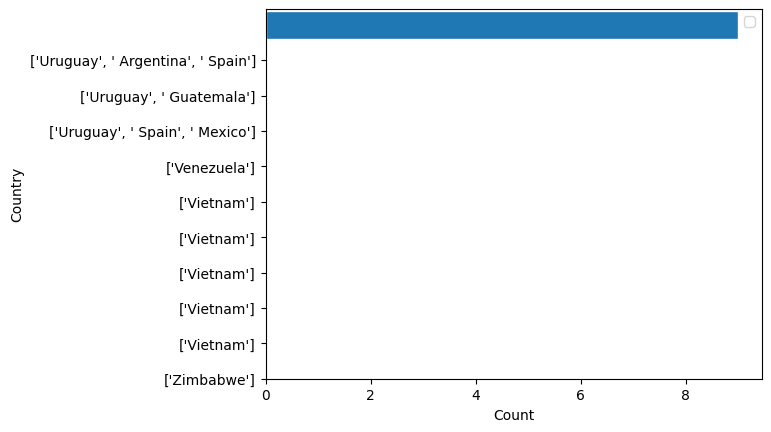

In [123]:

y = np.arange(len(top_10))
x = top_10['country'].count()
y_label = top_10['country']
x_label = top_10['country'].count()


plt.barh(x, y, edgecolor='white')
plt.yticks(y,y_label)
# plt.xticks(x,x_label) 
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend()
plt.show()

# 제목, 장르, 요약내용 특성 값을 기반으로 한 콘텐츠 기반 필터링 추천

## 데이터 전처리

### 추천 알고리즘 분석과 관련한 컬럼만 추출
- 추출 대상 컬럼: 'show_id', 'title', 'listed_in', 'description'    

In [125]:
netflix_df = netflix[['show_id','title','listed_in','description']]
netflix_df

,show_id,title,listed_in,description
1,s2,7:19,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Dramas,A brilliant group of students become card-coun...
5,s6,46,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...
7778,s7779,Zombieland,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Zoo,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Zoom,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Zozo,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


### DTM(Document Term Matrix) 생성
- title, listed_in, description 컬럼에 대해 피쳐 카운터 백터를 생성한다.
    - CounterVectorizer 또는 TfidfVectorizer 클래스를 이용한다.
    - nltk 라이브러리의 stopwords 패키지와 string 패키지의 punctuation을 합쳐 불용어 목록을 만들어 구두점 및 불용어를 제거한다.
    - title, listed_in, description 각 컬럼의 피처 벡터화한 결과를 **matrix_netflix_vocab = []** 리스트에 저장한다.

In [126]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

title_vect = CountVectorizer(min_df=0, ngram_range=(1,1))
title_mat = title_vect.fit_transform(netflix['title'])
listed_in_vect = CountVectorizer(min_df=0, ngram_range=(1,1))
listed_in_mat = listed_in_vect.fit_transform(netflix['listed_in'])
description_vect = CountVectorizer(min_df=0, ngram_range=(1,1))
description_mat = description_vect.fit_transform(netflix['description'])

# 콘텐츠 유사도 측정

- title, listed_in, description 각 컬럼에 대해 피처 백터화 한 값을 이용하여 각각의 코사인 유사도를 산출하여 **matrix_netflix_sim = []** 리스트에 저장한다.

In [138]:
from sklearn.metrics.pairwise import cosine_similarity

title_sim = cosine_similarity(title_mat, title_mat).argsort()[:, ::-1]
listed_in_sim = cosine_similarity(listed_in_mat, listed_in_mat).argsort()[:, ::-1]
description_sim = cosine_similarity(description_mat, description_mat).argsort()[:, ::-1]

matrix_netflix_sim = [title_sim,listed_in_sim,description_sim]

- title, listed_in, description에 대해 각각 유사도가 높은 순으로 정렬한 콘텐츠의 인덱스를 **netflix_sim_sorted_ind = []** 리스트에 저장한다.

In [140]:
netflix_sim_sorted_ind =matrix_netflix_sim
print(matrix_netflix_sim[0][:10])

[[   0 2054 1596 ... 3207 3208 2403]
 [   1 1980 4807 ... 3207 3208    0]
 [4807 1596 1598 ... 3207 3208    0]
 ...
 [   7 4807 1605 ... 3207 3208    0]
 [   8 1605 1598 ... 3207 3208    0]
 [   9 4807 1598 ... 3207 3208    0]]


# 유사도 필터링을 이용한 넷플릭스 콘텐츠 추천

In [154]:
# 완성된 함수가 아니며, 위 마크다운 셀의 내용을 참고하여 함수 안의 코드를 완성한다.

def find_sim_netflix(df, sorted_ind_list, title_name, top_n=10):
    target_netflix = df[df['title'] == title_name]
    title_index = target_netflix.index.values
    
     # 각 컬럼별 유사도 순으로 top_n 개의 index를 추출한 행렬을 저장할 리스트
    similar_indexes_list = []
    
    for sorted_ind_list in sorted_ind_list:
        similar_indexes = sorted_ind_list[title_index, :top_n]
        similar_indexes = similar_indexes.reshape(-1)
        similar_indexes_list.append(similar_indexes)
        
    # 데이터 프레임의 인덱스 값으로 사용하기 위해 1차원 데이터로 변환한다.
    return df.iloc[np.array(similar_indexes_list).flatten()]

In [155]:
# '응답하라 1988' 과 제목, 장르, 줄거리가 유사한 콘텐츠를 각각 10개씩 추천
similar_netflix = find_sim_netflix(netflix_df, netflix_sim_sorted_ind, '응답하지마 1988',10)

In [146]:
similar_netflix[['title']]